In [4]:
# !pip install git+https://github.com/windj007/TexSoup timeout-decorator
# !apt-get install -y latexmk
# !pip install ngram

In [1]:
%load_ext autoreload
%autoreload 2

from table_gen import *

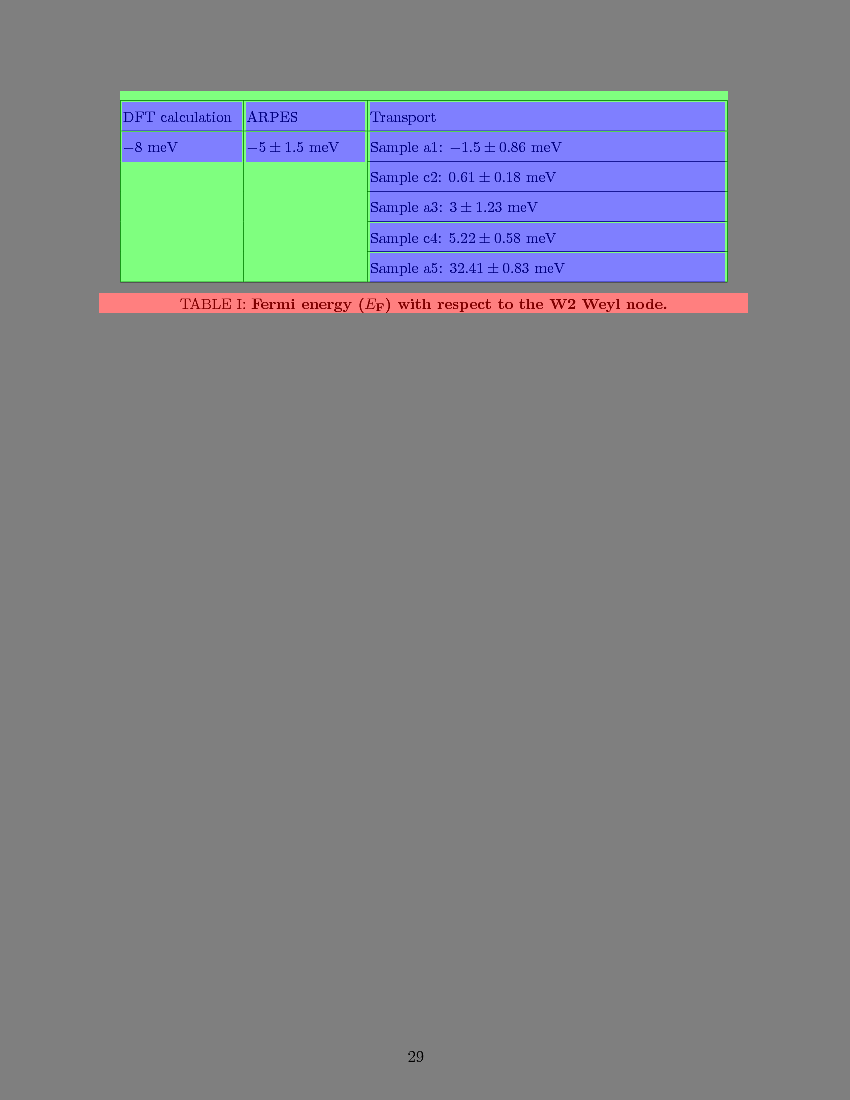

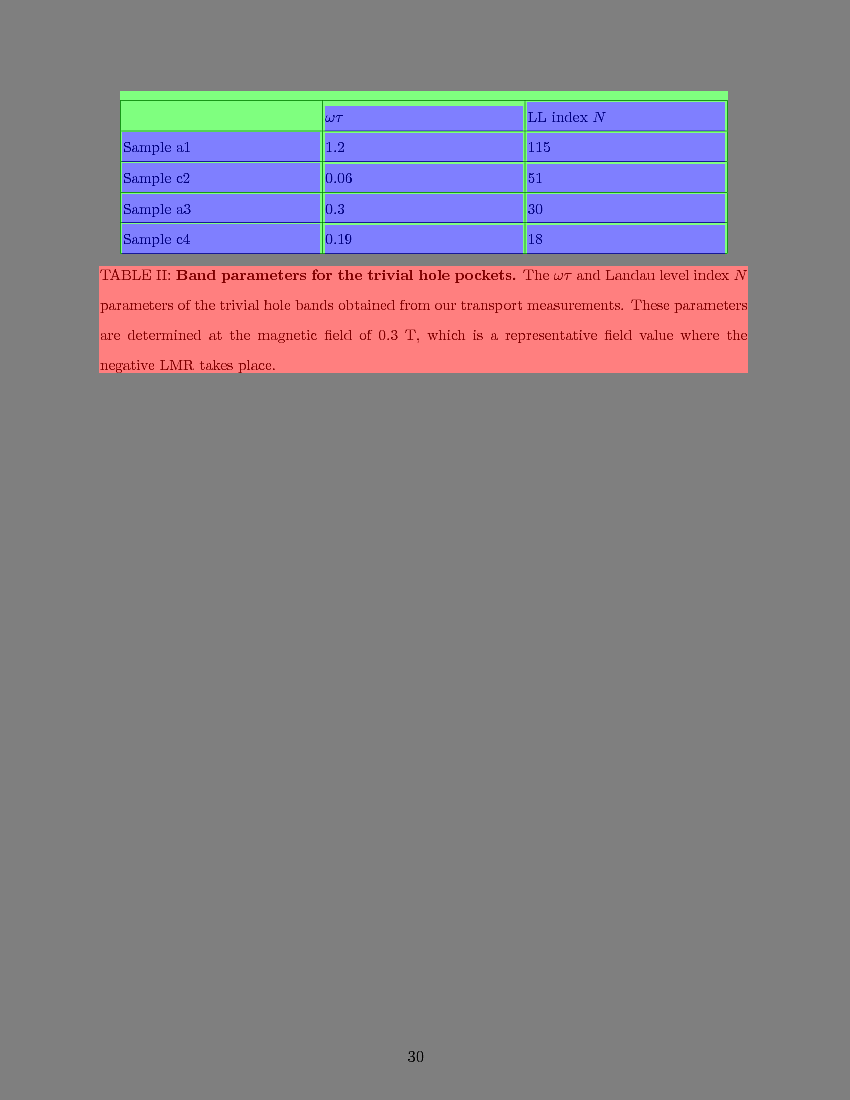

StopIteration: 

In [282]:
# pdf2samples('./data/arxiv/1/1312.6989.tar.gz', './data/arxiv/buf/', get_table_info, aggregate_object_bboxes, display_demo=True)
pdf2samples('./data/arxiv/1/44/1601.04208.tar.gz', './data/arxiv/buf/', get_table_info, aggregate_object_bboxes, display_demo=True)
pdf2samples('./data/arxiv/sources/1006.1798.tar.gz', './data/arxiv/buf/', get_table_info, aggregate_object_bboxes, display_demo=True)
# pdf2samples('./data/arxiv/1/5/1201.2088.tar.gz', './data/arxiv/buf/', get_table_info, aggregate_object_bboxes, display_demo=True)
pdf2samples('./data/arxiv/1/8/0708.1672.tar.gz', './data/arxiv/buf/', get_table_info, aggregate_object_bboxes, display_demo=True)

# Analyze error logs

In [ ]:
# frequent_errors = collections.Counter(err
#                                       for f in glob.glob('./data/arxiv/err_logs/*.log')
#                                       for err in {line
#                                                   for line in open(f, 'r', errors='replace')
#                                                   if "error:" in line})
# frequent_errors.most_common(10)

# Debug

In [32]:
# preprocess_latex_file('./data/arxiv/1/44/The_Chiral_Anomaly_Final_Posting.tex')
# compile_latex('./data/arxiv/1/44/')
# !mkdir ./data/arxiv/1/44/pages/
# pages = pdf_to_pages('./data/arxiv/1/44/The_Chiral_Anomaly_Final_Posting.pdf', './data/arxiv/1/44/pages')
# with open('./data/arxiv/1/44/The_Chiral_Anomaly_Final_Posting.tex') as f:
#     soup = TexSoup.TexSoup(f.read())

test_latex = r'''
\begin{table}
\renewcommand{\arraystretch}{1.13}
\setlength{\tabcolsep}{2pt}
\begin{tabular}{|c|c r }
  & DUANcxVqI & \makecell{ rB j,qMkryrtb.hg \\ d } \\
\hline *sV & C- & twBj*k \\
\hline bskU ME OvUsqnea & mavUgY*rE & MQPyVtU \\
 \makecell{ cPOqg ,BkoVARhKj \\ YypmCE uspcdJ \\ .ydjyldiFgWr } & CjFNF*Q & xWaFJU \\

\end{tabular}
\end{table}
'''
soup = TexSoup.TexSoup(test_latex)

In [ ]:
# !cat -n ./data/arxiv/1/44/The_Chiral_Anomaly_Final_Posting.tex

In [33]:
tables = list(soup.find_all('table'))

In [34]:
t = tables[0]

In [35]:
t.tabular

\begin{tabular}{|c|c r }
  & DUANcxVqI & 
\makecell{ rB j,qMkryrtb.hg \\ d }
 \\

\hline *sV & C- & twBj*k \\

\hline bskU ME OvUsqnea & mavUgY*rE & MQPyVtU \\
 
\makecell{ cPOqg ,BkoVARhKj \\ YypmCE uspcdJ \\ .ydjyldiFgWr }
 & CjFNF*Q & xWaFJU \\

\end{tabular}

In [37]:
qq = structurize_tabular_contents(t.tabular)
qq

,DUANcxVqI,"\makecell{ rB j,qMkryrtb.hg \\ d }"
*sV,C-,twBj*k
bskU ME OvUsqnea,mavUgY*rE,MQPyVtU
"\makecell{ cPOqg ,BkoVARhKj \\ YypmCE uspcdJ \\ .ydjyldiFgWr }",CjFNF*Q,xWaFJU


In [507]:
list(get_all_tokens(qq.rows[5][0]))

['multirow', '2', '*', 'FdOSYK', 'Trm,L*', 'cShnI', 'eQaoc']

In [508]:
list(qq.rows[5][0].contents)

[\multirow{2}{*}{FdOSYK Trm,L* cShnI eQaoc}]

In [ ]:
ww = qq.rows[2][2].contents[0]
print(ww)
print(type(ww))
src_pos = soup.char_pos_to_line(ww.position + len(ww.text) // 2)
src_pos

In [ ]:
o = subprocess.check_output(['synctex', 'view',
                          '-i', '{}:{}:{}'.format(src_pos[0] + 1,
                                                  src_pos[1] + 1,
                                                  'The_Chiral_Anomaly_Final_Posting.tex'),
                          '-o', 'The_Chiral_Anomaly_Final_Posting.pdf'],
                         cwd='./data/arxiv/1/44/').decode('ascii')
p = parse_synctex_output(o)

In [ ]:
page_i, boxes = list(p.items())[0]
box = boxes[0]
print(page_i, box)

In [ ]:
pdf = PdfMinerWrapper('./data/arxiv/1/44/The_Chiral_Anomaly_Final_Posting.pdf')
pdf.load()

In [ ]:
page_info = pdf.get_page(page_i-1)
found_boxes = list(pdf.get_boxes(page_i-1, [convert_coords_to_pq(box, page_info[1].cropbox)]))
print(pdf.get_text(page_i-1, [convert_coords_to_pq(box, page_info[1].cropbox)]))

In [ ]:
page_img = load_image_opaque(pages[page_i - 1])
make_demo_mask(page_img,
               [(1,
                 (convert_coords_from_pq(fb.bbox, page_info[1].cropbox) * POINTS_TO_PIXELS_FACTOR).astype('int'))
                for fb in found_boxes] +
               [(1, (numpy.array(b) * POINTS_TO_PIXELS_FACTOR).astype('int')) for b in boxes])

In [ ]:
# print('\n*********\n'.join(map(str, get_all_tokens(t.tabular))))

# Generate tables

In [4]:
# table_def = gen_table_contents()
# print('columns', len(table_def[2][0]), 'rows', len(table_def[2]))

In [5]:
# render_table(table_def, '/notebook/templates/springer/', '/notebook/generated/1.pdf',
#              display_demo=True)

In [6]:
def gen_and_save_table(i, seed):
    numpy.random.seed(seed)
    table_def = gen_table_contents()
    render_table(table_def, '/notebook/templates/springer/', '/notebook/generated/src/{}'.format(i))

seeds = numpy.random.randint(0, 3000, size=3000)
joblib.Parallel(n_jobs=8)(joblib.delayed(gen_and_save_table)(i, s) for i, s in enumerate(seeds))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# Get some statistics

In [ ]:
archive_files = list(glob.glob('./data/arxiv/sources/*.tar.gz'))
print('Total downloaded', len(archive_files))
print('Types:\n', collections.Counter(read_metadata(archive)['content_type']
                                      for archive in archive_files).most_common())
print()

In [ ]:
good_papers = set()
bad_papers = set()

if os.path.exists('./good_papers.lst'):
    with open('./good_papers.lst', 'r') as f:
        good_papers = set(line.strip() for line in f)
if os.path.exists('./bad_papers.lst'):
    with open('./bad_papers.lst', 'r') as f:
        bad_papers = set(line.strip() for line in f)

In [ ]:
random.shuffle(archive_files)
for archive in archive_files:
    if archive in bad_papers or archive in good_papers:
        continue

    if contains_something_interesting(archive, get_table_info):
        good_papers.add(archive)

    if len(good_papers) >= 5000:
        break

In [ ]:
with open('./good_papers.lst', 'w') as f:
    f.write('\n'.join(sorted(good_papers)))
with open('./bad_papers.lst', 'w') as f:
    f.write('\n'.join(sorted(bad_papers)))

# Apply pipeline to some papers

In [ ]:
for arc in good_papers:
    try:
        pdf2samples(arc, './data/arxiv/inout_pairs/', get_table_info, aggregate_object_bboxes)
    except Exception as ex:
        print(arc, ex)

In [ ]:
for arc in good_papers:
    display(arc)
    try:
        pdf2samples(arc, get_table_info, aggregate_object_bboxes_no_union)
    except Exception as ex:
        print(arc, ex)

In [ ]:
for arc in good_papers:
    display(arc)
    try:
        pdf2samples(arc, get_table_info, no_bbox_aggregation)
    except Exception as ex:
        print(arc, ex)